In [56]:
import numpy as np
import pandas as pd

import seaborn as sns

import numpy as np
import pandas as pd

from random import random, uniform
from io import StringIO

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
%run Model.ipynb

In [58]:
computed = pd.read_pickle('./data/computed.pickle')
computed = computed.reset_index()
#computed["Group"] = computed["Pokemon"]
computed["Group"] = computed["Label"]
computed = computed.set_index(["Group","Label"])
computed.head(5)

,,Pokemon,Level,SpdMod,IngMod,BerMod,SklMod,Ingredients,Berries,IngBonus,BerryBonus,Period,Help3h,IngFactor
Group,Label,,,,,,,,,,,,,
08/08 Pichu Lvl: 3,08/08 Pichu Lvl: 3,Pichu,3,,,,,1,8,1.0,2.0,4282.868526,2.521674,1.0
"08/09 Pikachu Lvl: 5, Ing: -, Skl: +","08/09 Pikachu Lvl: 5, Ing: -, Skl: +",Pikachu,5,,-,,+,1,15,1.0,2.0,2678.571429,4.032000,0.8
"08/14 Pikachu Lvl: 12, Spd: M, Ing: +","08/14 Pikachu Lvl: 12, Spd: M, Ing: +",Pikachu,12,M,+,,,3,16,1.0,2.0,2272.015656,4.753488,1.2
"08/17 Pikachu Lvl: 13, Spd: +","08/17 Pikachu Lvl: 13, Spd: +",Pikachu,13,+,,,,2,15,1.0,2.0,2373.046875,4.551111,1.0
"08/25 Pikachu Lvl: 5, Ing: +","08/25 Pikachu Lvl: 5, Ing: +",Pikachu,5,,+,,,2,13,1.0,2.0,2678.571429,4.032000,1.2


In [59]:
recompute = True
nb_samples = 100000

if recompute:

    # extract unique group
    group = list(computed.index.get_level_values(0).unique())
    obs_by_spec = dict([(name,computed.loc[name].to_dict(orient='records', index=True)) for name in group])

    # setup storage, list are much faster to grow than dataframe.
    rnd_trials_list = []
    rnd_params_list = []

    for index_trial in range(0,nb_samples):

        ingredient_fraction = uniform(0, 0.4)
        energy_m = uniform(2.0, 2.5)

        results = []

        for name in group:
            
            obs = obs_by_spec[name]
            res = 1.0

            for item in obs:
                
                res *= 1.0 if validate(item,item, ingredient_fraction, energy_m) else 0
                if(res == 0): 
                    break;

            results.append(res)
 
        if(sum(results) == 0): 
            continue

        rnd_trials_list.append(results)
        rnd_params_list.append([ingredient_fraction,energy_m])

        
    #convert list to dataframe
    rnd_trials = pd.DataFrame(rnd_trials_list, columns = group)
    rnd_params = pd.DataFrame(rnd_params_list, columns = ["ingredient%","energy_m"])
    

    rnd_params.to_pickle('./saved/rnd_params.pickle')
    rnd_trials.to_pickle('./saved/rnd_trials.pickle')
    

else:
    
    rnd_params = pd.read_pickle('./saved/rnd_params.pickle')
    rnd_trials = pd.read_pickle('./saved/rnd_trials.pickle')

In [60]:
rnd_trials.describe()
rnd_params.describe()

,08/08 Pichu Lvl: 3,"08/09 Pikachu Lvl: 5, Ing: -, Skl: +","08/14 Pikachu Lvl: 12, Spd: M, Ing: +","08/17 Pikachu Lvl: 13, Spd: +","08/25 Pikachu Lvl: 5, Ing: +","08/11 Raichu Lvl: 12, Spd: +","08/14 Raichu Lvl: 16, Spd: +, Ber: S, Skl: -","08/15 Raichu Lvl: 16, Spd: +, Ber: S"
count,23673.000000,23673.000000,23673.000000,23673.000000,23673.000000,23673.000000,23673.000000,23673.000000
mean,0.368394,0.344781,0.169814,0.214379,0.233008,0.155198,0.098551,0.098551
std,0.482379,0.475307,0.375477,0.410400,0.422756,0.362101,0.298065,0.298065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ingredient%,energy_m
count,23673.000000,23673.000000
mean,0.203021,2.152431
std,0.049389,0.106464
min,0.076317,2.000005
25%,0.169437,2.065040
50%,0.213254,2.131441
75%,0.243346,2.223544
max,0.285337,2.469561


In [61]:
# Here we enforce that energy_m is shared by all mons.

energy_m_mins = []
energy_m_maxs = []
    
    
for col in rnd_trials.columns:
    
    values = rnd_params["energy_m"].loc[rnd_trials[col]==1]
    energy_m_mins.append(values.min())
    energy_m_maxs.append(values.max())
    
low = max(energy_m_mins)
high = min(energy_m_maxs)

valid = rnd_params["energy_m"].between(low, high)

rnd_trials = rnd_trials.loc[valid]
rnd_params = rnd_params.loc[valid]


(low,high)



(2.1583287642793225, 2.25065376166713)

In [62]:
rnd_trials.describe()
rnd_params.describe()

,08/08 Pichu Lvl: 3,"08/09 Pikachu Lvl: 5, Ing: -, Skl: +","08/14 Pikachu Lvl: 12, Spd: M, Ing: +","08/17 Pikachu Lvl: 13, Spd: +","08/25 Pikachu Lvl: 5, Ing: +","08/11 Raichu Lvl: 12, Spd: +","08/14 Raichu Lvl: 16, Spd: +, Ber: S, Skl: -","08/15 Raichu Lvl: 16, Spd: +, Ber: S"
count,5089.000000,5089.000000,5089.000000,5089.000000,5089.000000,5089.000000,5089.000000,5089.000000
mean,0.314207,0.456868,0.170957,0.197485,0.310867,0.341914,0.214187,0.214187
std,0.464245,0.498185,0.376508,0.398140,0.462894,0.474398,0.410298,0.410298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ingredient%,energy_m
count,5089.000000,5089.000000
mean,0.214027,2.200327
std,0.033231,0.026526
min,0.137775,2.158329
25%,0.187955,2.177496
50%,0.214589,2.198434
75%,0.242181,2.222162
max,0.275270,2.250654


In [63]:
def get_valid_params(cols):

    df = rnd_trials[cols].copy()
    df = df.loc[(df!=0).all(axis=1)]
    return rnd_params.loc[df.index]


In [64]:
from scipy.spatial import ConvexHull
from matplotlib.path import Path
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def plot_hull(df, ax, name, **kwargs):
    
    points = df[["ingredient%", "energy_m"]].to_numpy()
    hull = ConvexHull(points)
    hullpts = points[hull.vertices,:]
    
    patch = Polygon(hullpts, closed=True, label=name, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    ax.add_collection(collection, autolim=True)
    
    return patch
    

In [65]:
def plot_group(cols, samples=None):
    
    if(samples is None):
        samples = get_valid_params(cols)
    
    # Standard scale to compare cluster.
    
    fig, ax = plt.subplots()
    #sns.scatterplot(data=samples,y="energy_m", x="ingredient%", alpha=0.8, ax=ax)
    plt.xlabel("Ingredient %",fontweight ='bold', size=14)
    plt.ylabel("Production Boost (M)", fontweight ='bold',size=14)
    name = " ".join(cols)
    plt.title(name)
    ax.set_xlim(0, 0.4)
    ax.set_ylim(2.16, 2.25)
    
    _ = plot_hull(pts,ax, name, alpha=0.8)
    
    display(fig)
    plt.close()


,ingredient%,energy_m
count,3370.000000,3370.000000
mean,0.203225,2.208905
std,0.024507,0.023581
min,0.159295,2.164402
25%,0.182068,2.189068
50%,0.202916,2.210019
75%,0.223464,2.229404
max,0.257033,2.247343


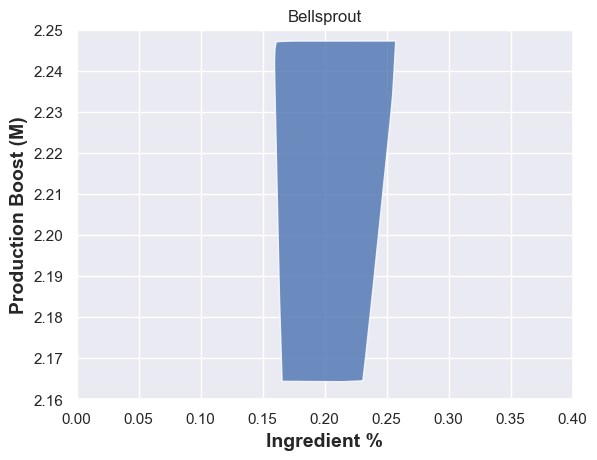

,ingredient%,energy_m
count,8559.000000,8559.000000
mean,0.236497,2.206953
std,0.060957,0.023980
min,0.129628,2.164374
25%,0.183152,2.186323
50%,0.236293,2.207435
75%,0.289111,2.228088
max,0.353422,2.247343


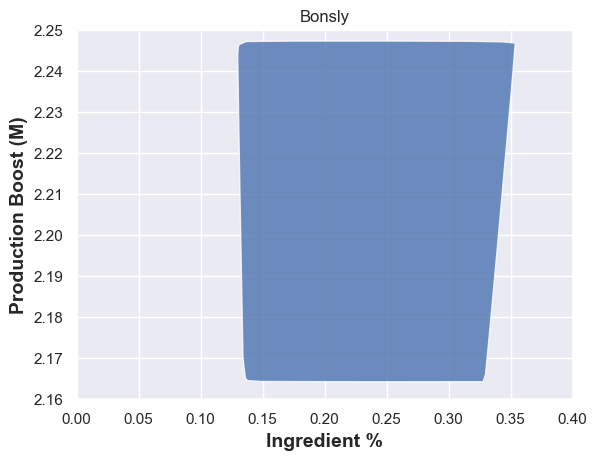

,ingredient%,energy_m
count,3090.000000,3090.000000
mean,0.227564,2.205626
std,0.022227,0.023799
min,0.186512,2.164374
25%,0.208268,2.185447
50%,0.227349,2.205529
75%,0.247060,2.226424
max,0.269274,2.247343


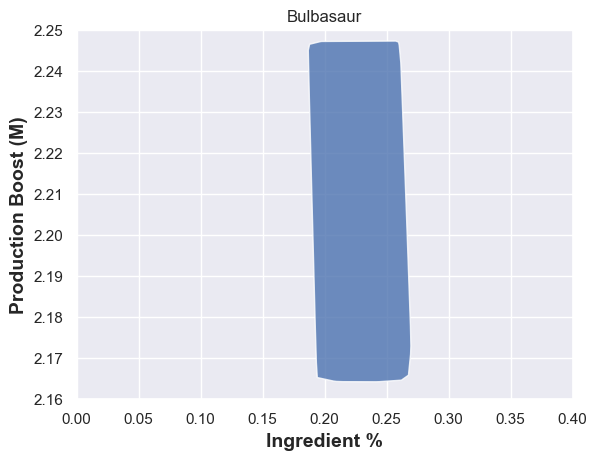

,ingredient%,energy_m
count,2129.000000,2129.000000
mean,0.196629,2.207000
std,0.016918,0.023393
min,0.162745,2.164469
25%,0.183057,2.187346
50%,0.196284,2.206601
75%,0.209594,2.227672
max,0.235994,2.247281


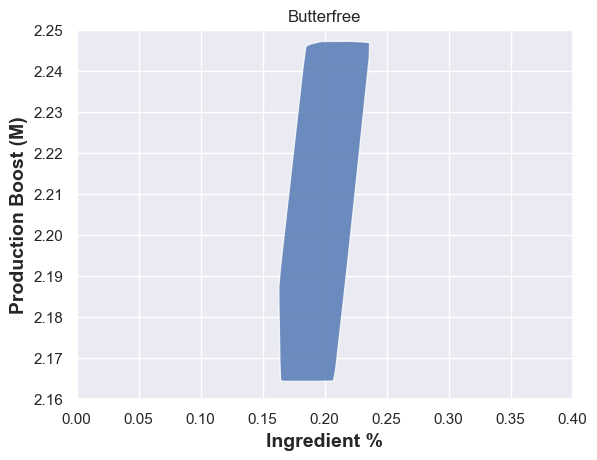

,ingredient%,energy_m
count,3107.000000,3107.000000
mean,0.148002,2.206066
std,0.023437,0.024103
min,0.096477,2.164390
25%,0.129267,2.185469
50%,0.147847,2.205910
75%,0.167247,2.227608
max,0.197322,2.247338


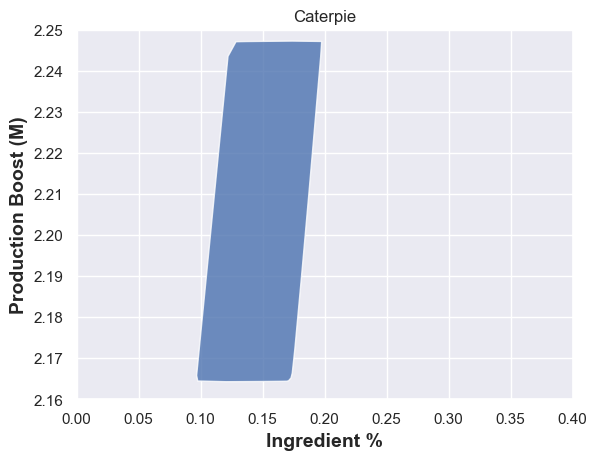

,ingredient%,energy_m
count,2550.000000,2550.000000
mean,0.195232,2.205055
std,0.018111,0.023559
min,0.162121,2.164402
25%,0.179662,2.185201
50%,0.195151,2.204350
75%,0.210915,2.225499
max,0.230539,2.247338


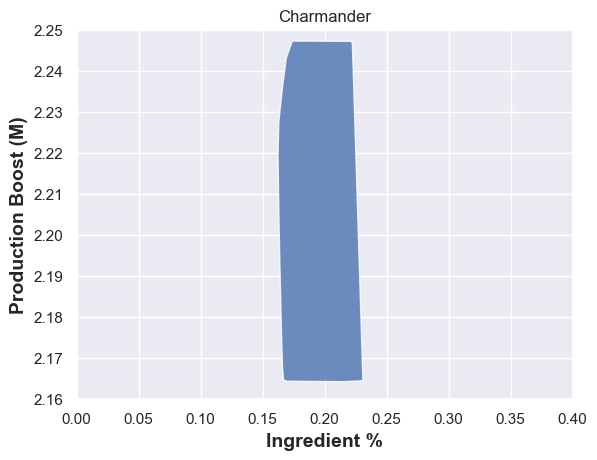

,ingredient%,energy_m
count,1933.000000,1933.000000
mean,0.238495,2.205524
std,0.014220,0.023918
min,0.210996,2.164374
25%,0.226359,2.185347
50%,0.238620,2.205739
75%,0.250653,2.226178
max,0.266638,2.247343


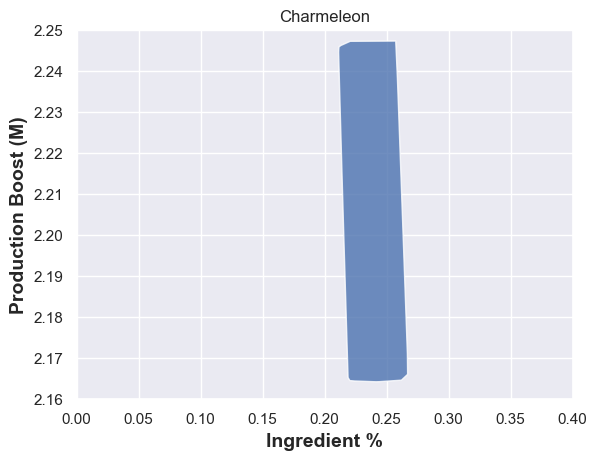

,ingredient%,energy_m
count,1610.000000,1610.000000
mean,0.145910,2.208969
std,0.015014,0.023653
min,0.115508,2.164390
25%,0.135143,2.188946
50%,0.144985,2.210273
75%,0.156786,2.229581
max,0.183084,2.247338


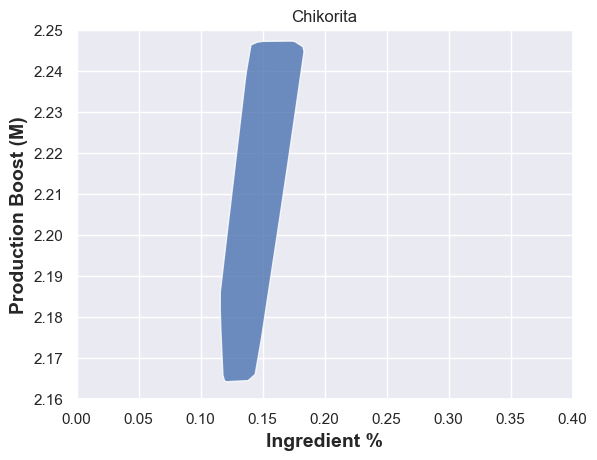

,ingredient%,energy_m
count,1621.000000,1621.000000
mean,0.201883,2.211833
std,0.012565,0.022747
min,0.178676,2.164469
25%,0.191543,2.193665
50%,0.201329,2.214423
75%,0.211531,2.231385
max,0.229840,2.247281


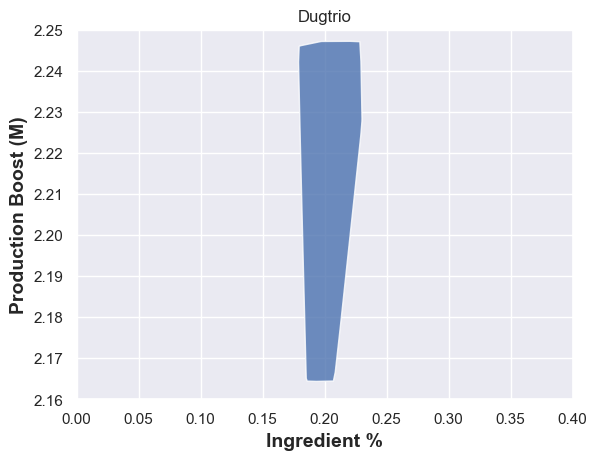

,ingredient%,energy_m
count,2013.000000,2013.000000
mean,0.183316,2.201169
std,0.015553,0.023322
min,0.143921,2.164442
25%,0.172161,2.181841
50%,0.183864,2.198660
75%,0.196262,2.220263
max,0.211746,2.247247


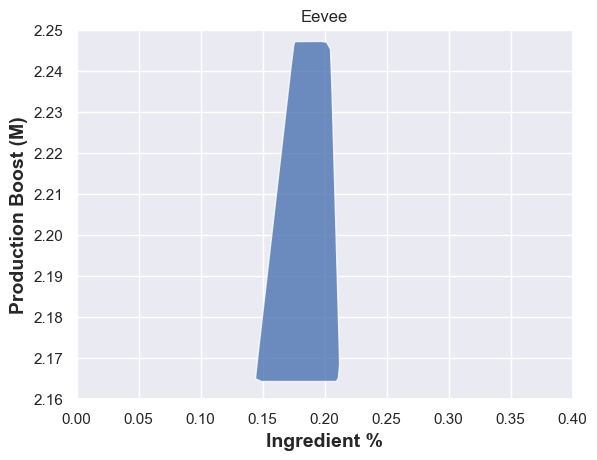

,ingredient%,energy_m
count,2569.000000,2569.000000
mean,0.164750,2.202098
std,0.019165,0.023661
min,0.120409,2.164442
25%,0.149111,2.181820
50%,0.165080,2.199814
75%,0.180906,2.222146
max,0.200438,2.247338


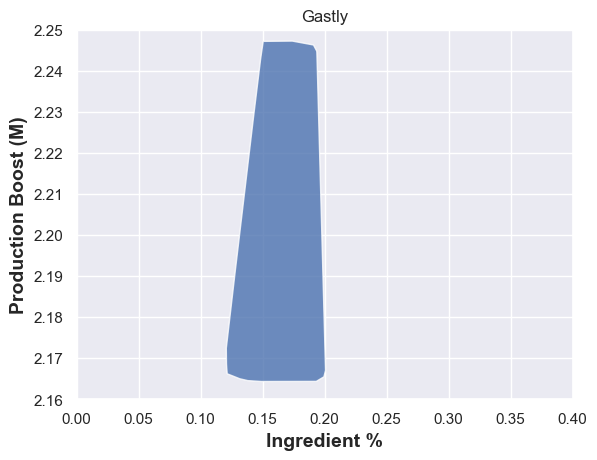

,ingredient%,energy_m
count,4787.000000,4787.000000
mean,0.238667,2.205506
std,0.034265,0.023863
min,0.176651,2.164374
25%,0.208855,2.185166
50%,0.238852,2.205385
75%,0.268008,2.226399
max,0.302600,2.247343


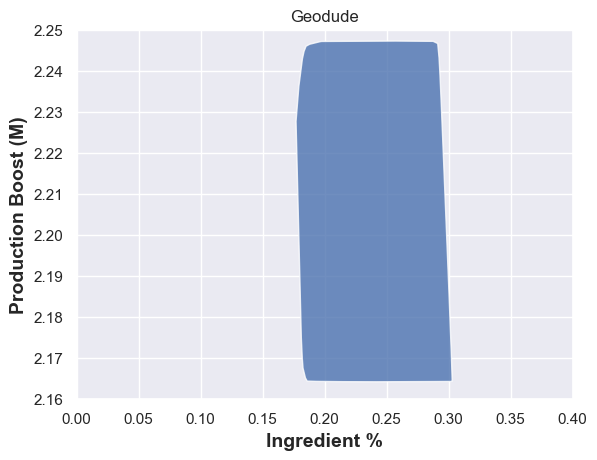

,ingredient%,energy_m
count,1879.000000,1879.000000
mean,0.292990,2.209508
std,0.013792,0.023859
min,0.265227,2.164437
25%,0.281360,2.189652
50%,0.292877,2.212086
75%,0.304116,2.230223
max,0.322420,2.247281


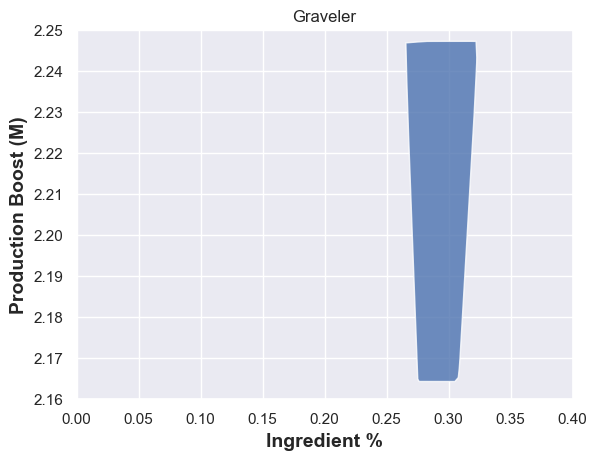

,ingredient%,energy_m
count,4545.000000,4545.000000
mean,0.217475,2.205752
std,0.033400,0.023835
min,0.147131,2.164374
25%,0.189589,2.185630
50%,0.217066,2.205518
75%,0.245834,2.226597
max,0.286041,2.247343


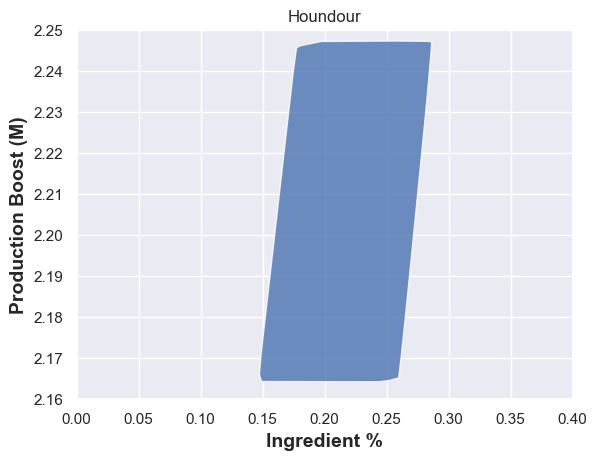

,ingredient%,energy_m
count,365.000000,365.000000
mean,0.249733,2.205893
std,0.005620,0.018503
min,0.238645,2.164374
25%,0.245188,2.191741
50%,0.249927,2.206884
75%,0.254420,2.220496
max,0.260216,2.247343


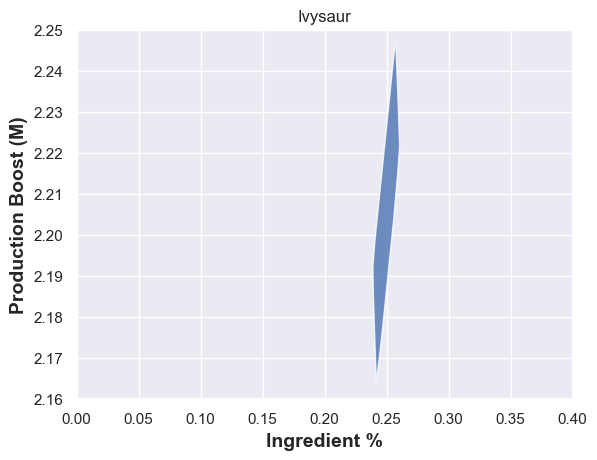

,ingredient%,energy_m
count,6413.000000,6413.000000
mean,0.222237,2.203607
std,0.046400,0.023848
min,0.126497,2.164374
25%,0.182757,2.183164
50%,0.222357,2.202536
75%,0.261963,2.224281
max,0.306563,2.247343


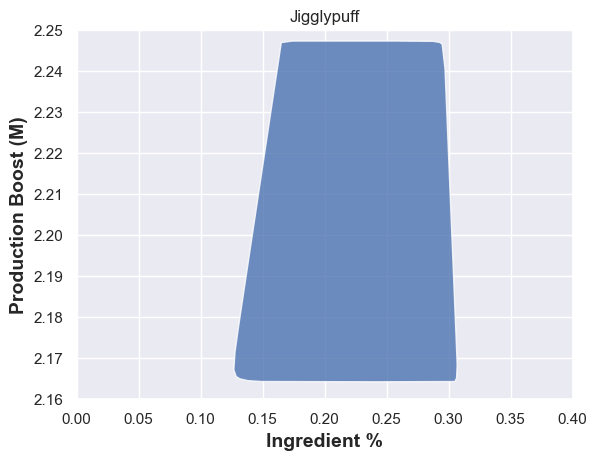

,ingredient%,energy_m
count,4024.000000,4024.000000
mean,0.199339,2.205827
std,0.028585,0.023962
min,0.146837,2.164374
25%,0.174704,2.185511
50%,0.199125,2.205537
75%,0.223863,2.226826
max,0.253050,2.247338


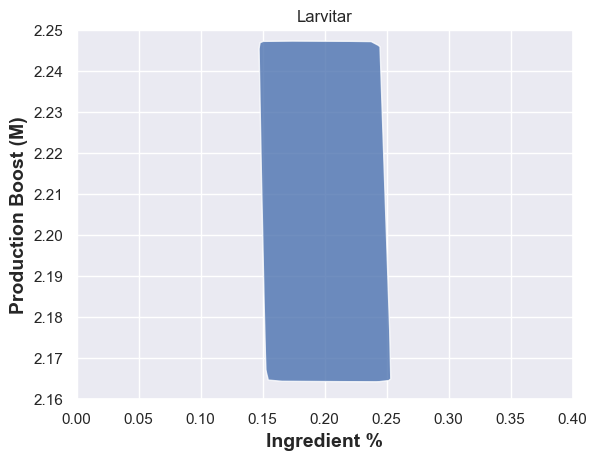

,ingredient%,energy_m
count,1476.000000,1476.000000
mean,0.196113,2.207408
std,0.014359,0.023583
min,0.162268,2.164469
25%,0.185531,2.187532
50%,0.195687,2.207270
75%,0.206158,2.228487
max,0.230492,2.247281


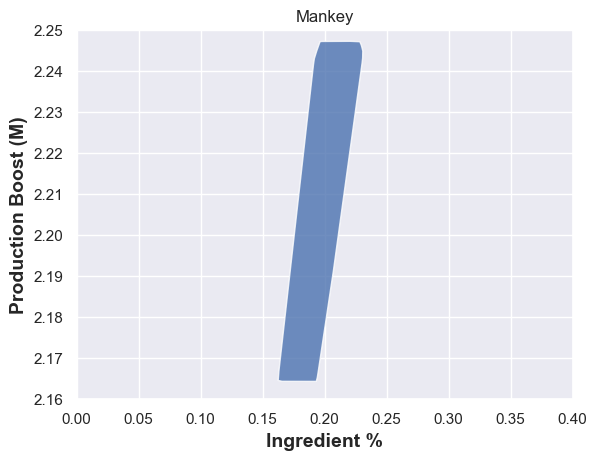

,ingredient%,energy_m
count,1345.000000,1345.000000
mean,0.252383,2.197862
std,0.011265,0.022600
min,0.222118,2.164374
25%,0.244494,2.178493
50%,0.253393,2.195309
75%,0.261308,2.215422
max,0.274657,2.247343


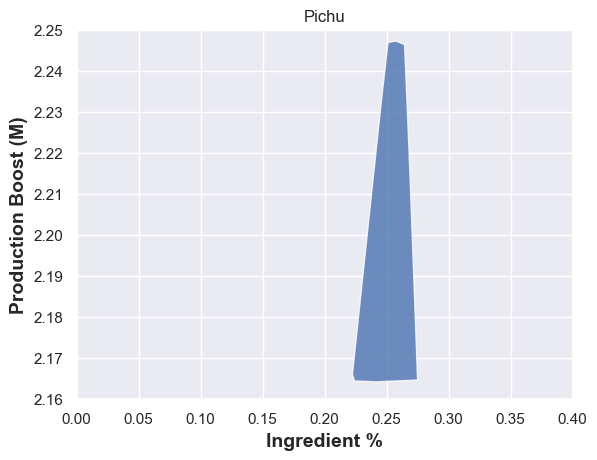

,ingredient%,energy_m
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


ValueError: No points given

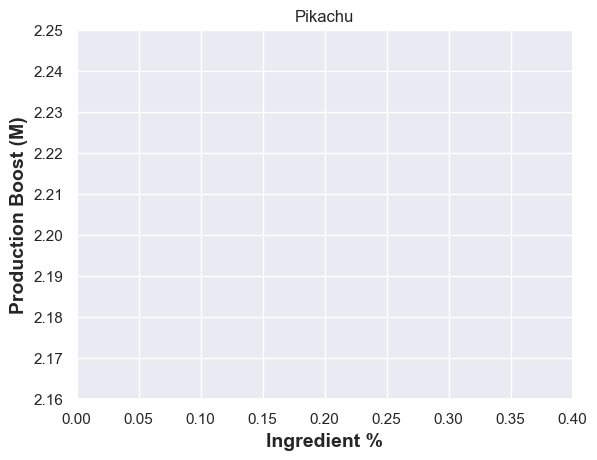

In [55]:
# Display individual Pokémon

all_portraits = []

for col in rnd_trials.columns:
    pts = get_valid_params([col]).copy()
    display(pts.describe())
    plot_group([col],pts)
    pts["group"] = col
    all_portraits.append(pts)



In [ ]:
# Save for next sheet.
df = pd.concat(all_portraits)
df.head()
df.to_pickle('./saved/portrait.pickle')



# I tried to plot these on the same graph... terrible idea.

#df = df.sample(int(0.05*len(df.index)))
#fig, ax = plt.subplots()
#sns.scatterplot(data=df,x="ingredient%", y="energy_m",alpha=0.8, hue="group", style="group", ax=ax, linewidth=0) #hue_order=orders
#sns.move_legend(
#    ax, "lower center",
#    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False
#)

    

In [ ]:
correl = rnd_trials.corr()

from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(correl, method='ward', metric='euclidean', optimal_ordering=True)

clust = sns.clustermap(correl, row_linkage=linkage_matrix, col_linkage=linkage_matrix)

In [ ]:
def merge_ratio(a, b):
    
    # Count non zero before merge: a
    df = rnd_trials[a].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size1 = len(df.index);
    
    # Count non zero before merge: b
    df = rnd_trials[b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size2 = len(df.index);
     
    if(size1==0 or size2==0): return 0;
    before = max(size1,size2)
    
    # Count non zero after merge
    df = rnd_trials[a + b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    after = len(df.index);
       
    return after / before
    

In [ ]:
# Here we keep merging into bigger cluster 
# while keeping intersection(a,b) above some fraction of max(a,b)

tresh = 0.15

n = len(correl.index)

output =  [None] * (2*n-1)

for i in range(0,n):
    output[i] = [correl.index[i]]

for i in range(0,n-1):
    
    a = int(linkage_matrix[i,0])   
    b = int(linkage_matrix[i,1])
    
    if output[a] == None or output[b] == None:
        output[n+i] = None
        continue

    if( merge_ratio(output[a], output[b]) > tresh):
        output[n+i] = output[a] + output[b]
        output[a] = None
        output[b] = None
        
    else:
        output[n+i] = None
    
output = list(filter(lambda x: x != None, output))

In [ ]:

allpts = []

for group in output:
    pts = get_valid_params(group).copy()
    display(pts.describe())
    plot_group(group, pts)
    pts["group"] = " ".join(group)
    allpts.append(pts)

In [ ]:
allpts = sorted(allpts, key=lambda x: -len(x.index)) 

fig, ax = plt.subplots()
_ = plt.xlabel("Ingredient %",fontweight ='bold', size=14);
_ = plt.ylabel("Production Boost (M)", fontweight ='bold',size=14);

handles, labels = plt.gca().get_legend_handles_labels()
palette = sns.color_palette(palette="muted", n_colors=8)
cidx = 0;

for pts in allpts:
    p = plot_hull(pts, ax, pts["group"].iloc[0], alpha=0.8, color = palette[cidx])
    cidx += 1
    handles.extend([p])

ax.autoscale()

_ = plt.legend(handles=handles)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)

display(fig)
plt.close()